In [21]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

from config_alpha_experiment import *

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Animals

In [22]:
date_min, date_max = utils.dj_utils.return_date_window(n_days_back=30)

ANIMAL_IDS = ALPHA_1_ANIMALS

## Load in Trials & Days Data

In [23]:
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min
)

[2024-07-23 19:24:38,373][WARNING]: MySQL server has gone away. Reconnecting to the server.


Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R040

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R041

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R042

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R043

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R044

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R045

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R046

Fetched 4 dates from Sessions table from 2024-07-20 to 2024-07-23 for R047



In [24]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-07-20 to 2024-07-22  
	Last date on the database is 2024-07-22 but user is querying data 
	for 2024-07-23. Attempting to manually aggregate today's data.
Today's, 2024-07-23, data exits and has been added to SessionAggDate.

32 daily summaries fetched for animals: 
['R040', 'R041', 'R042', 'R043', 'R044', 'R045', 'R046', 'R047']
between 2024-07-20 and 2024-07-23


# Plot Over Days

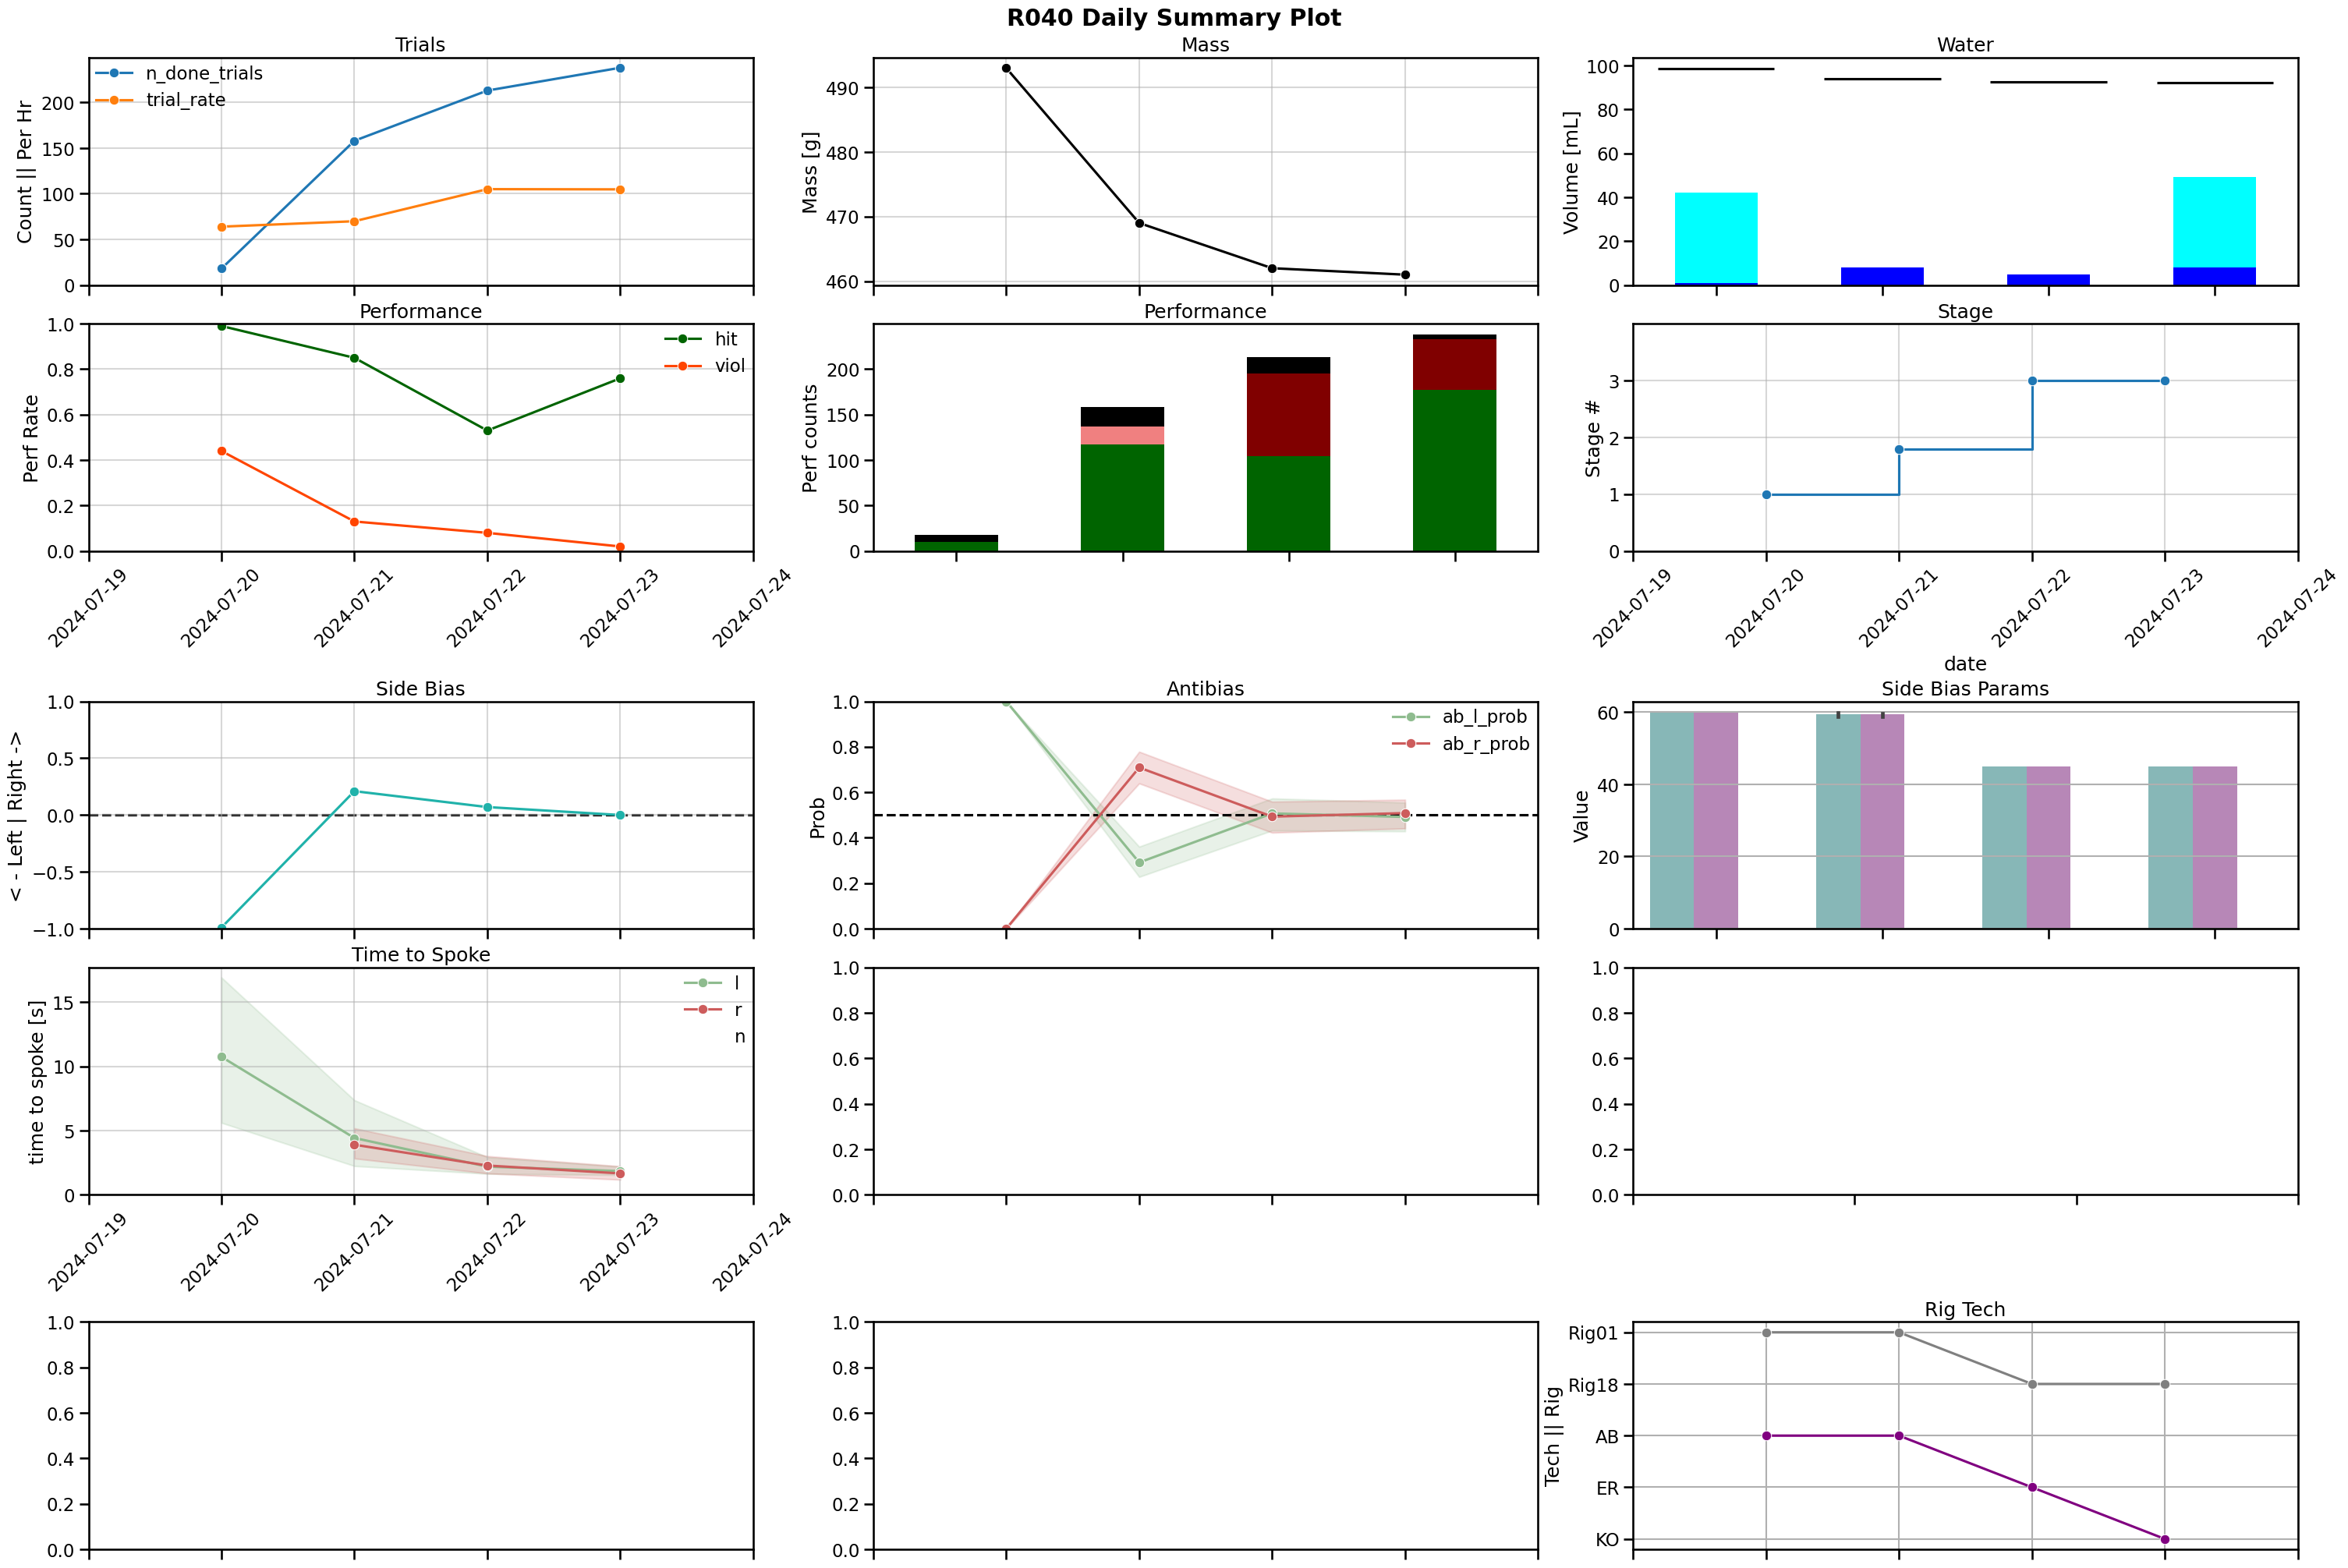

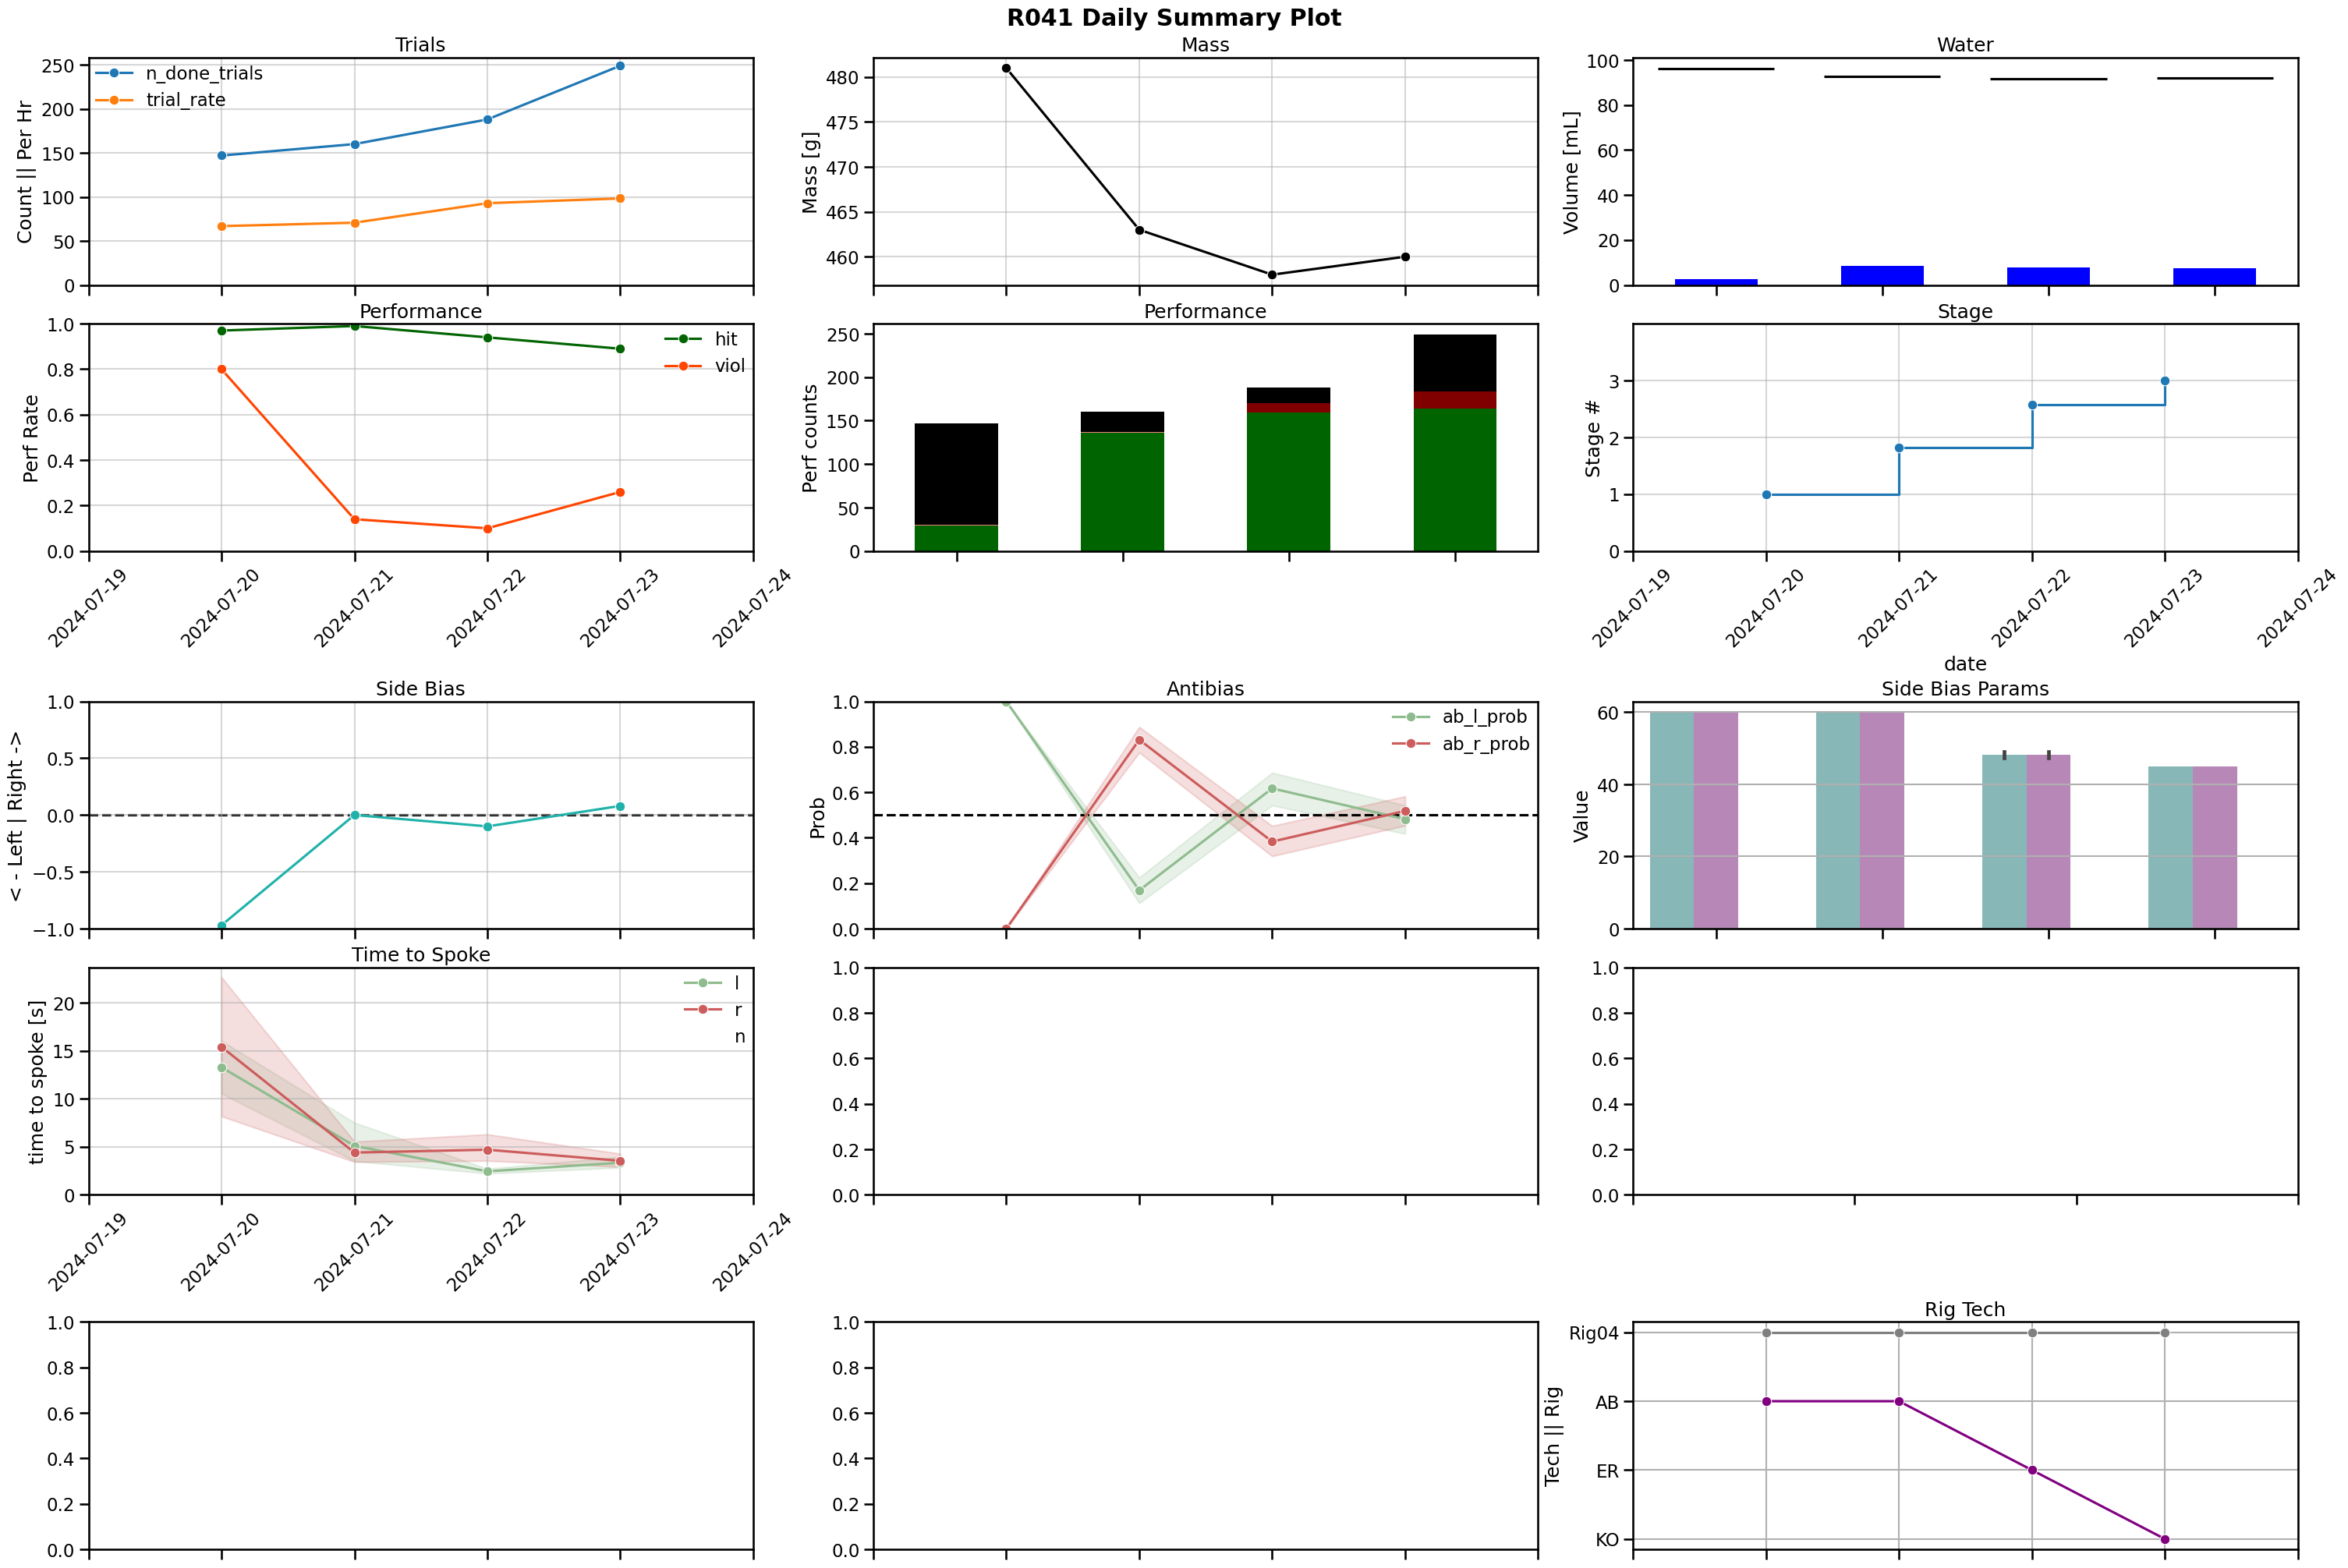

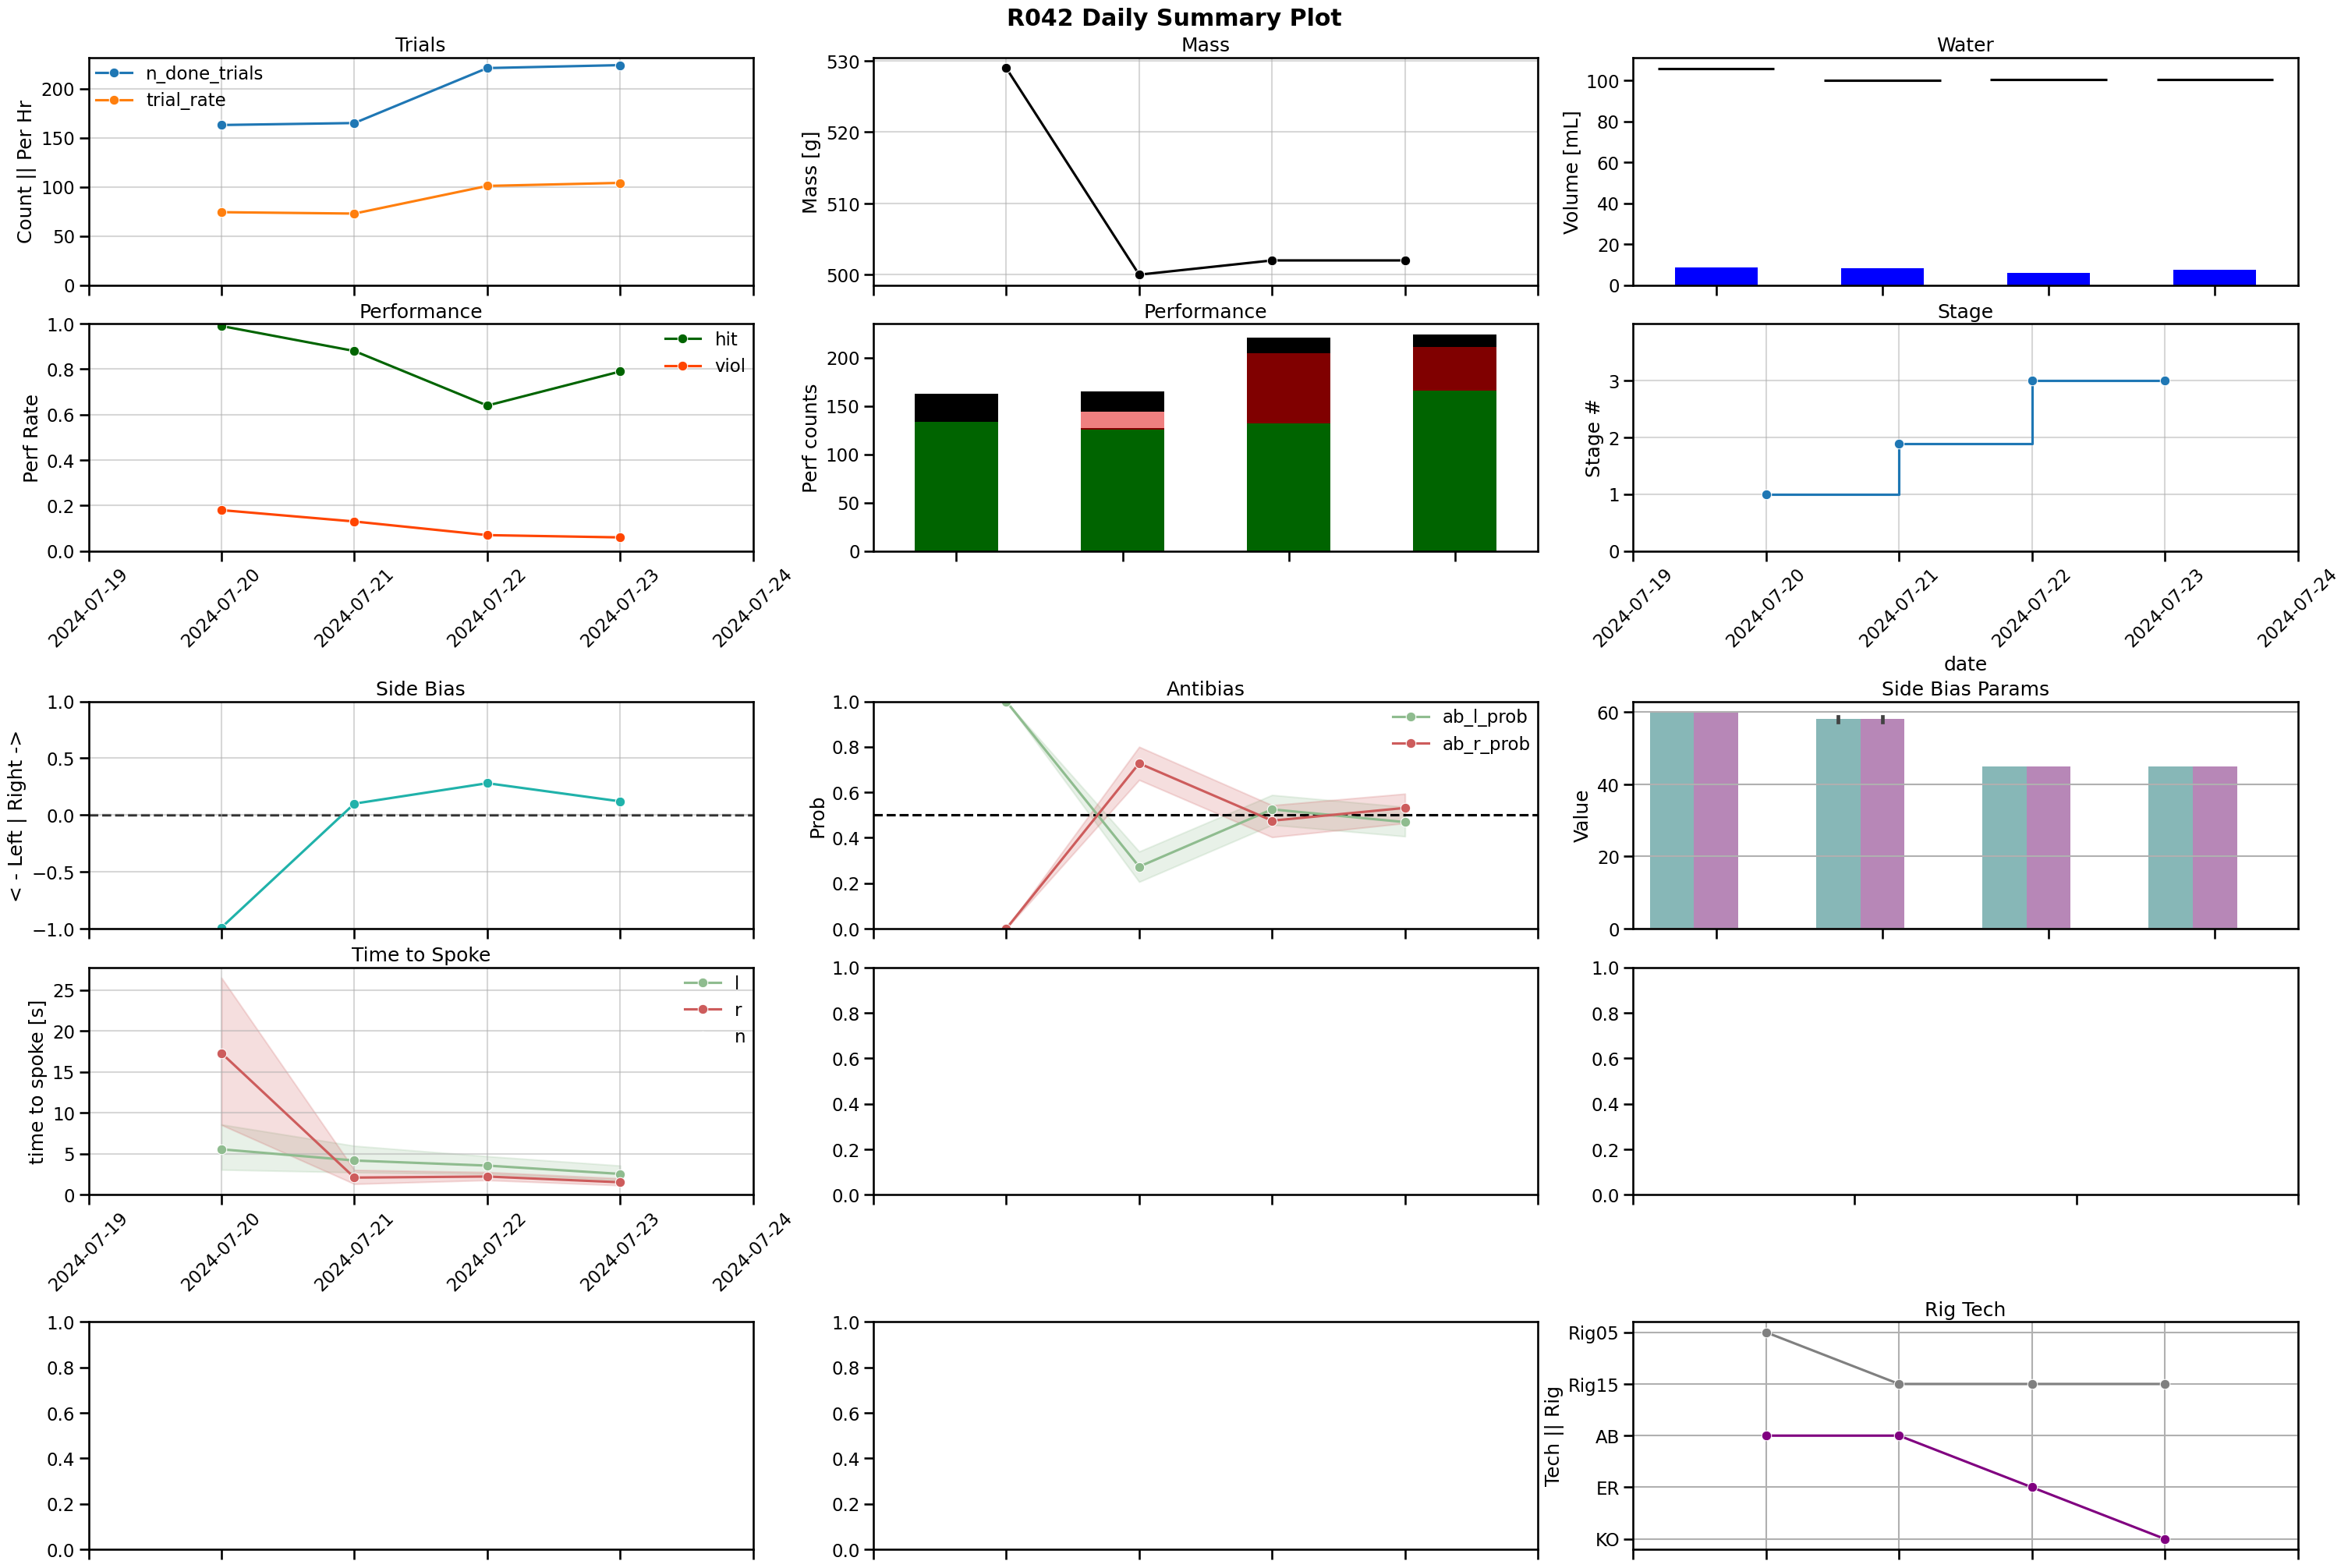

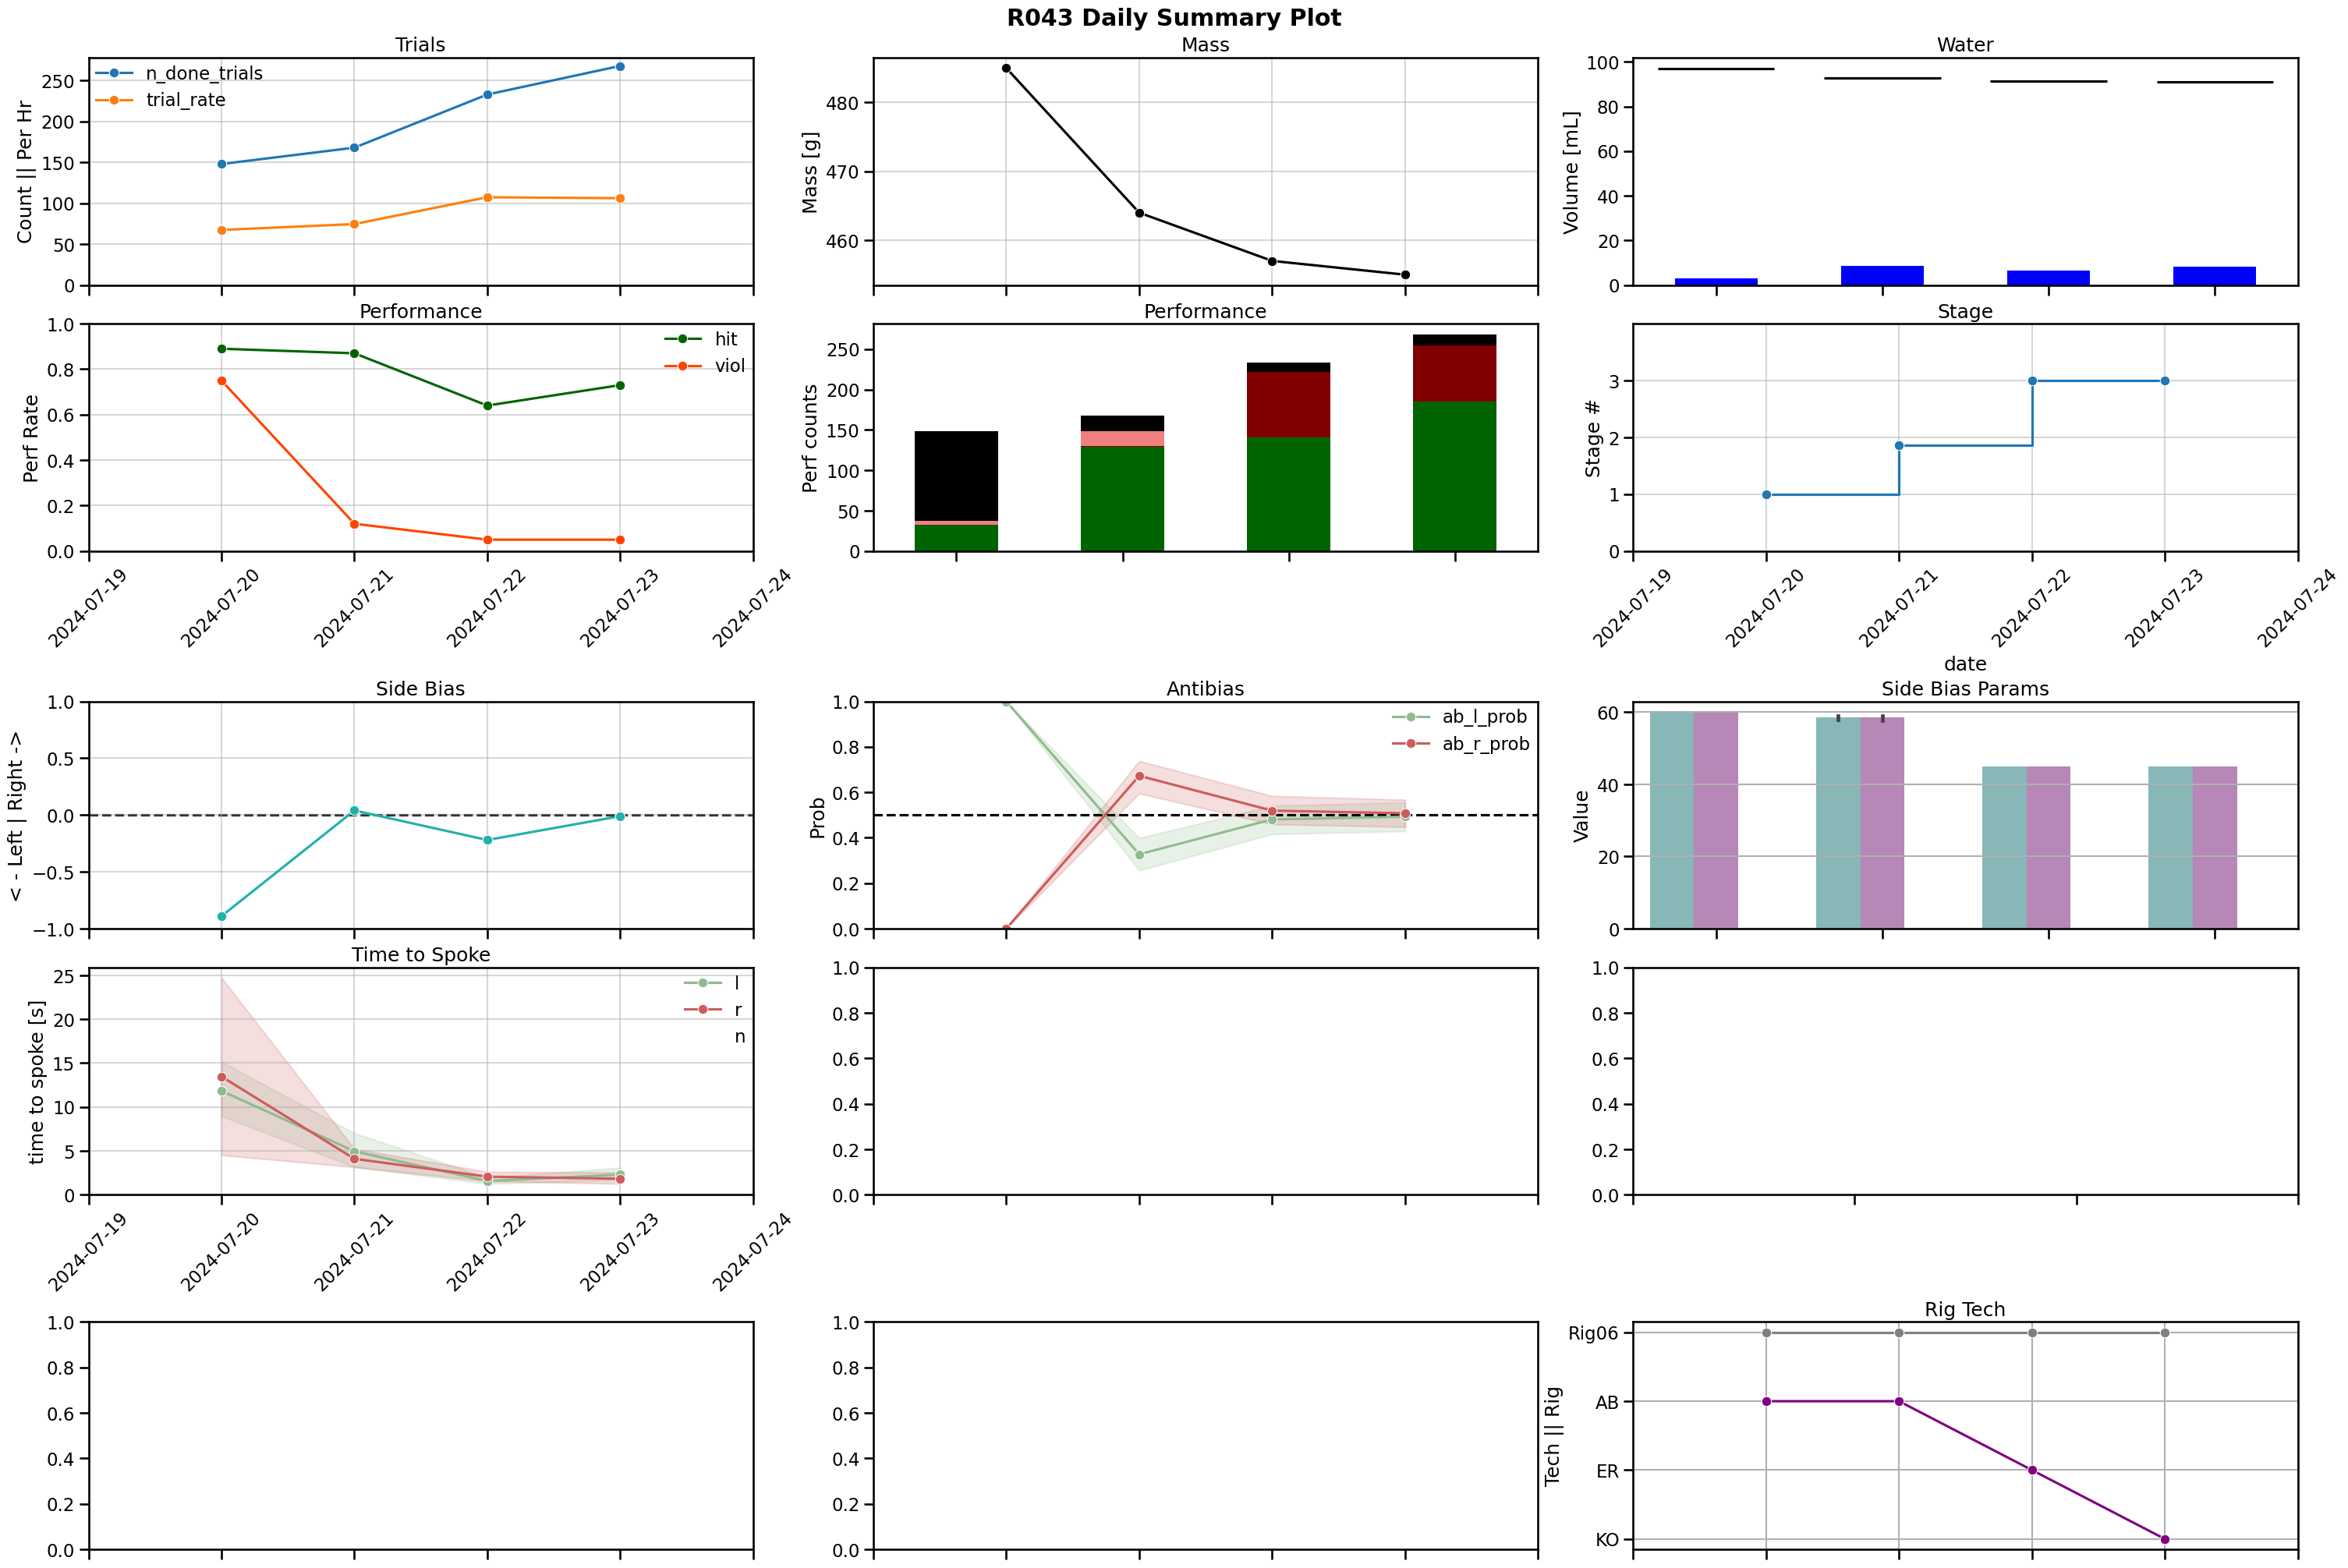

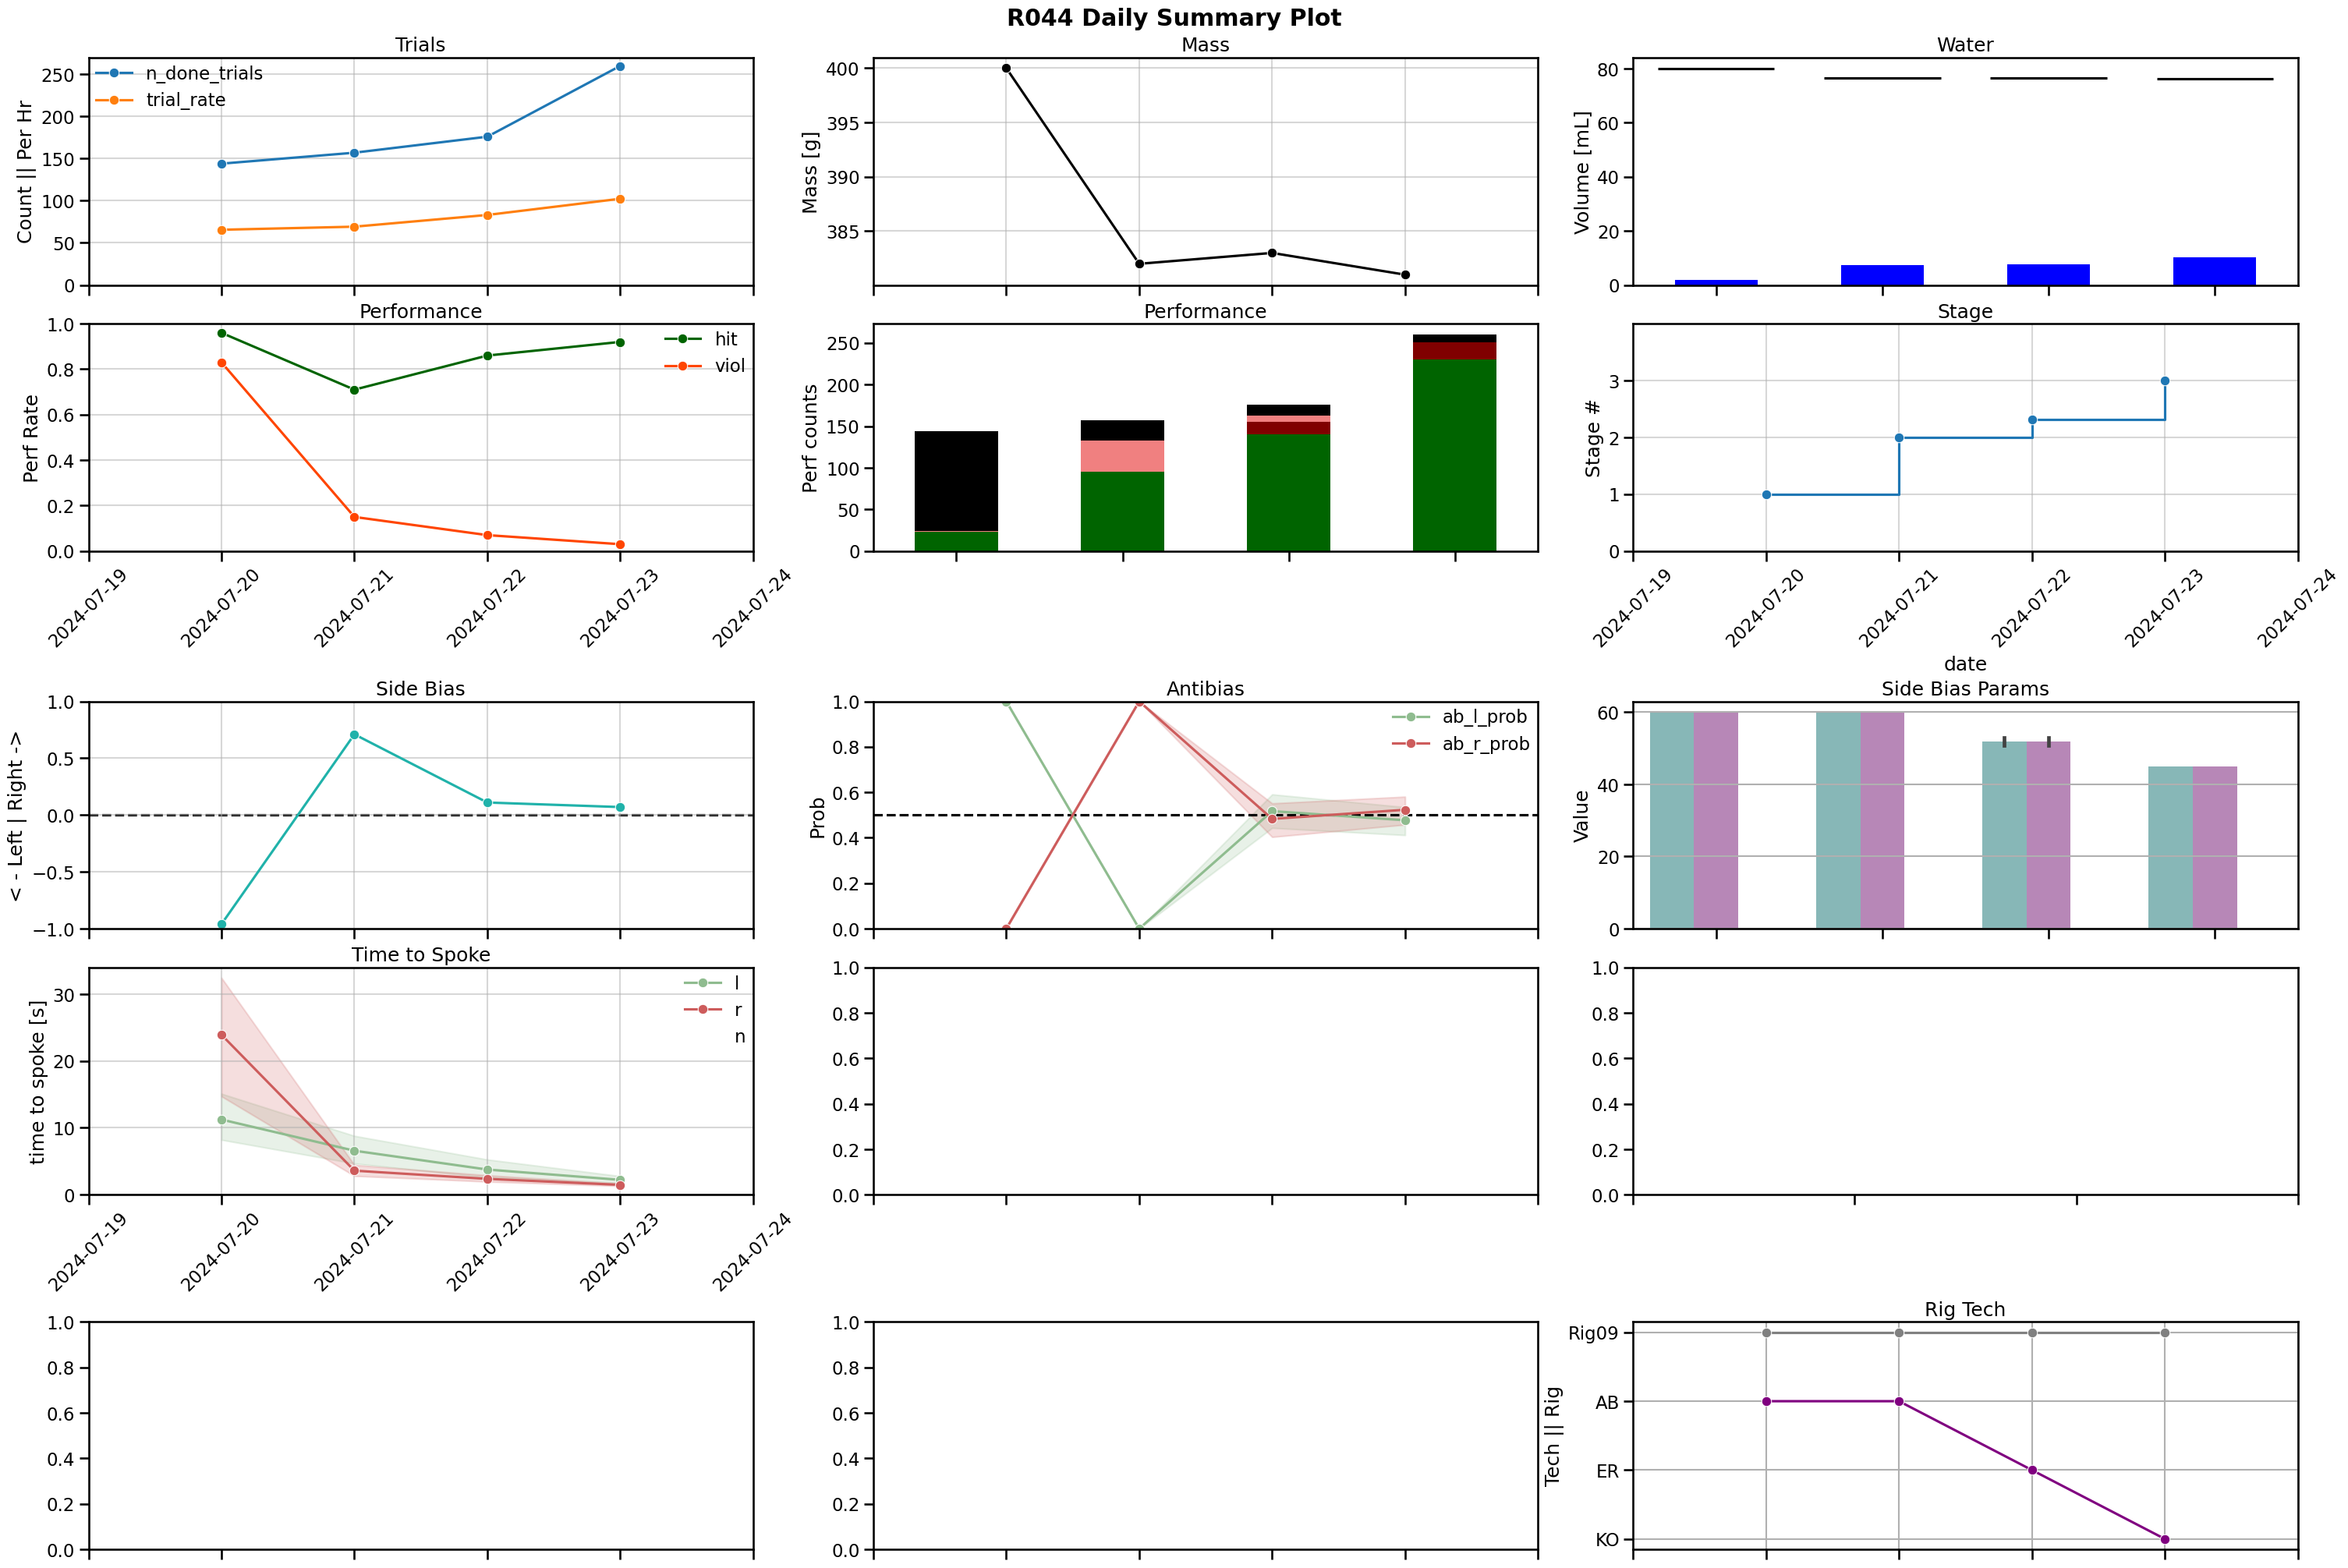

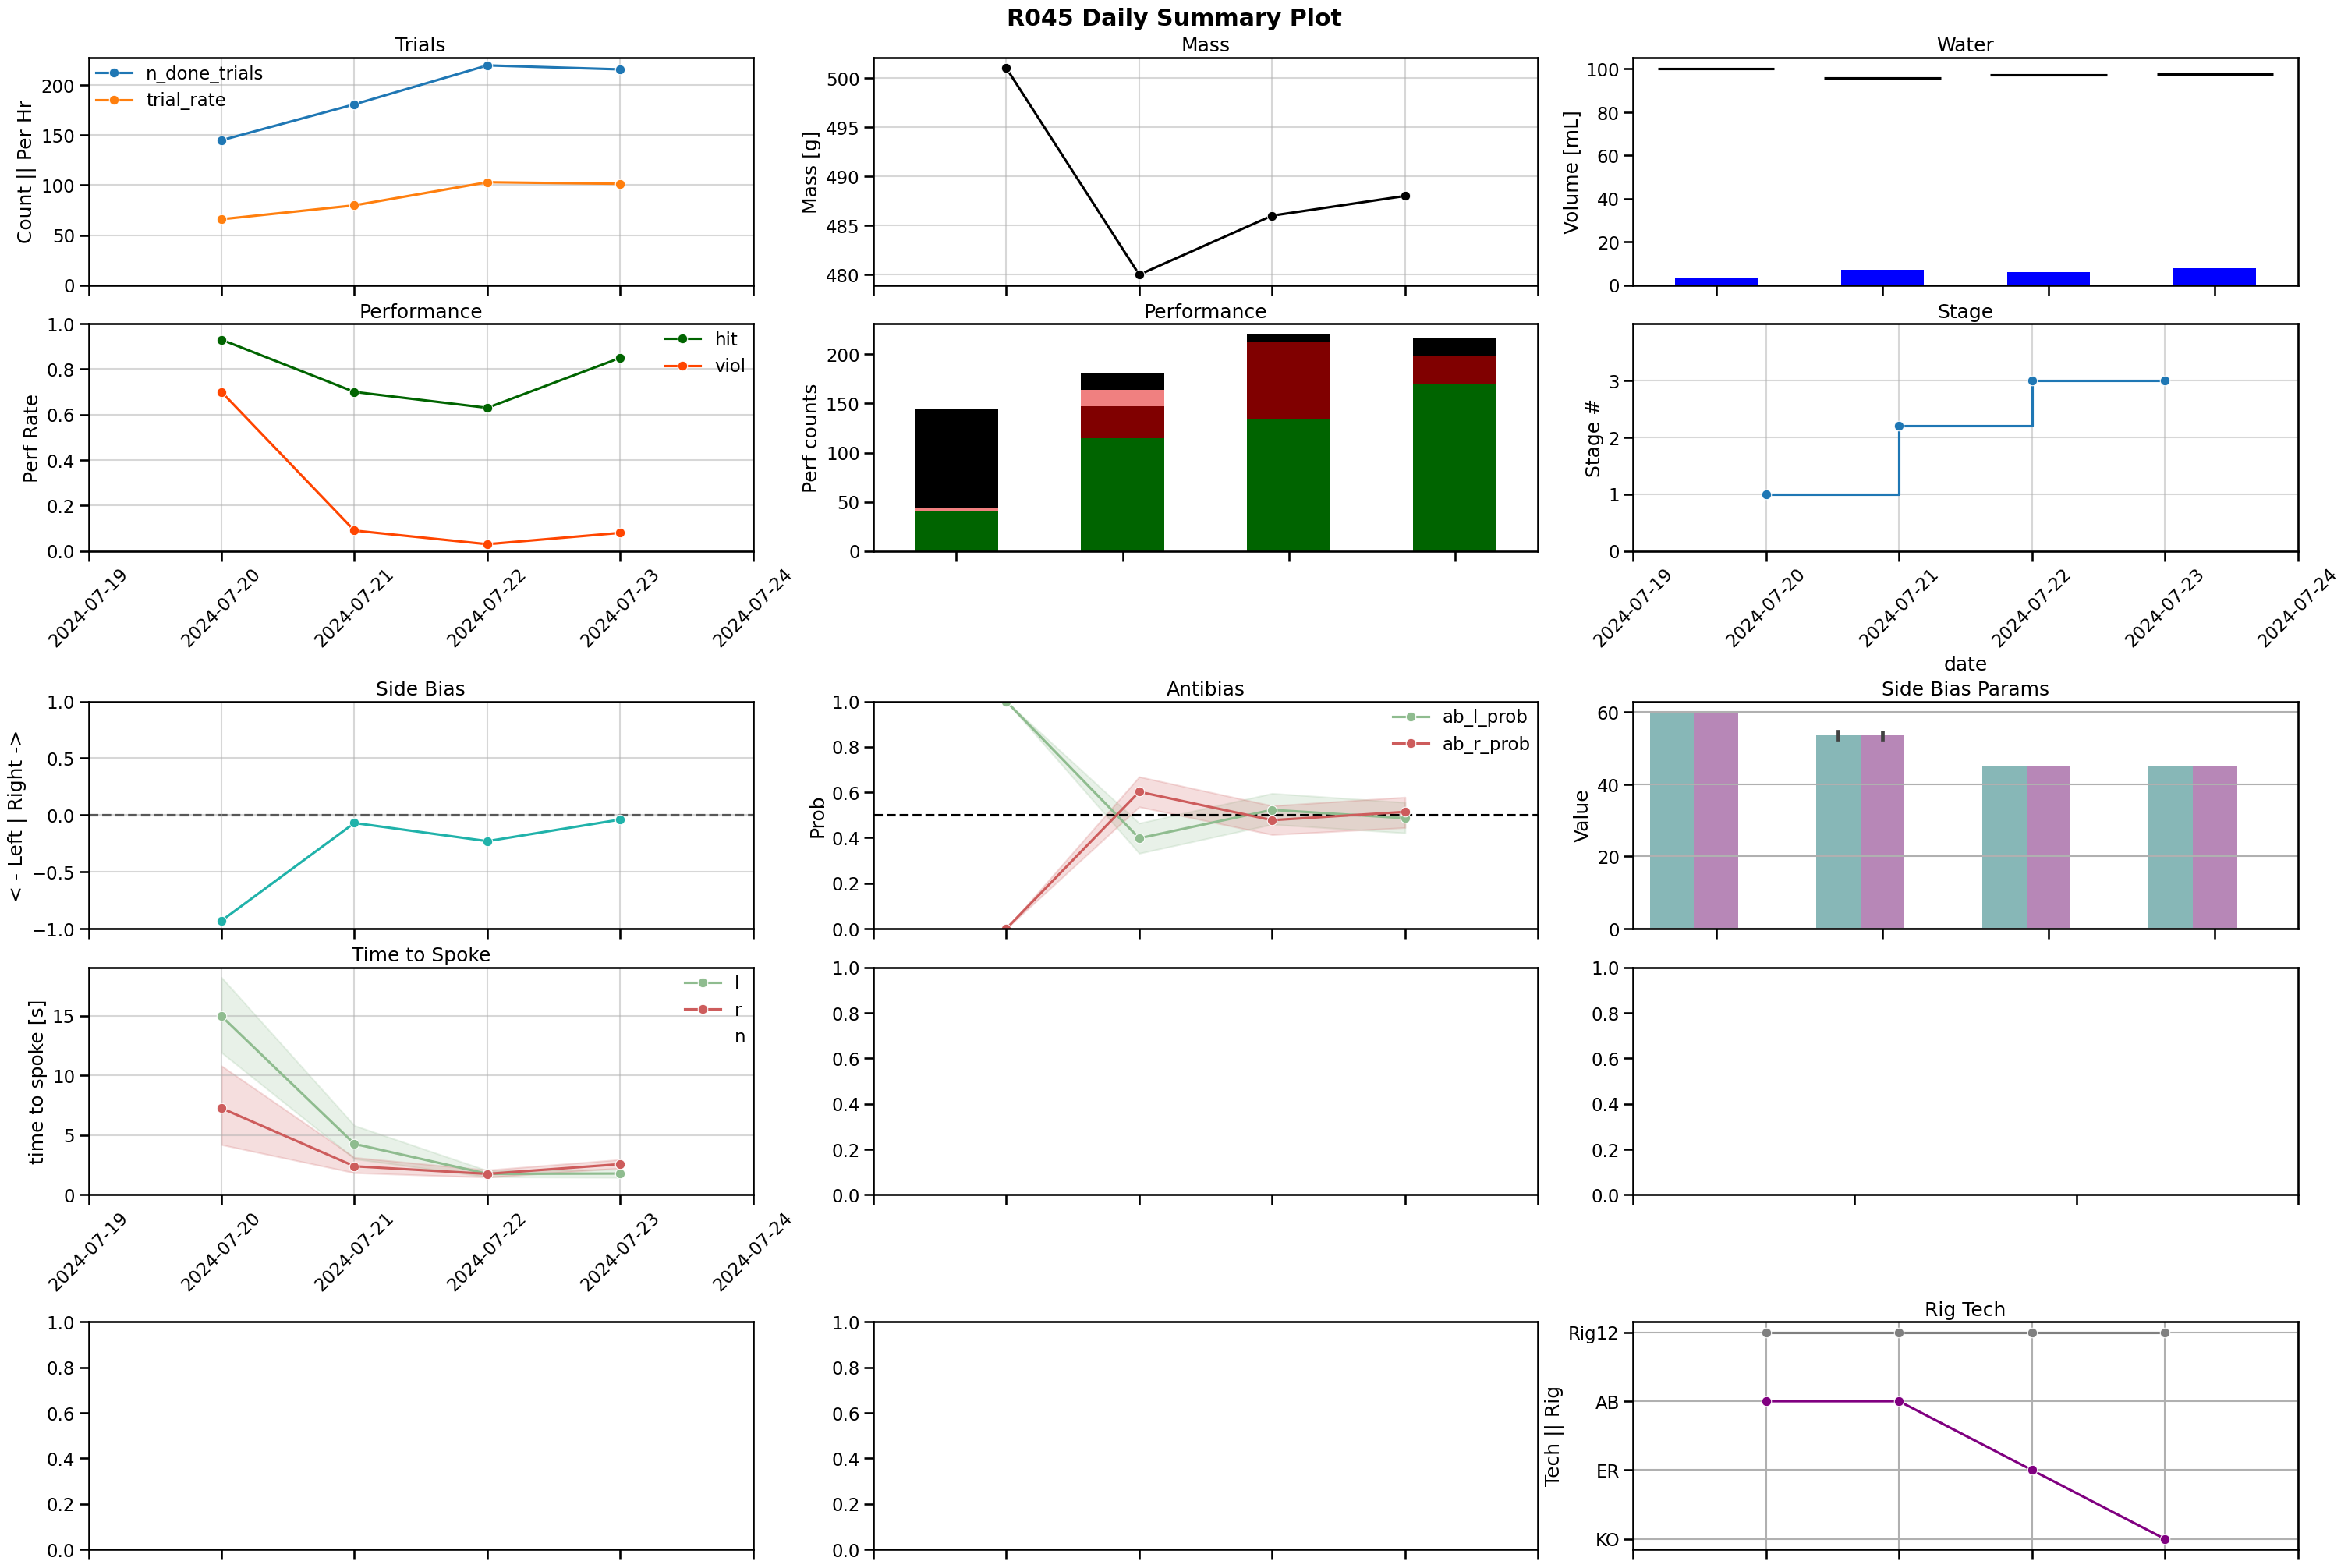

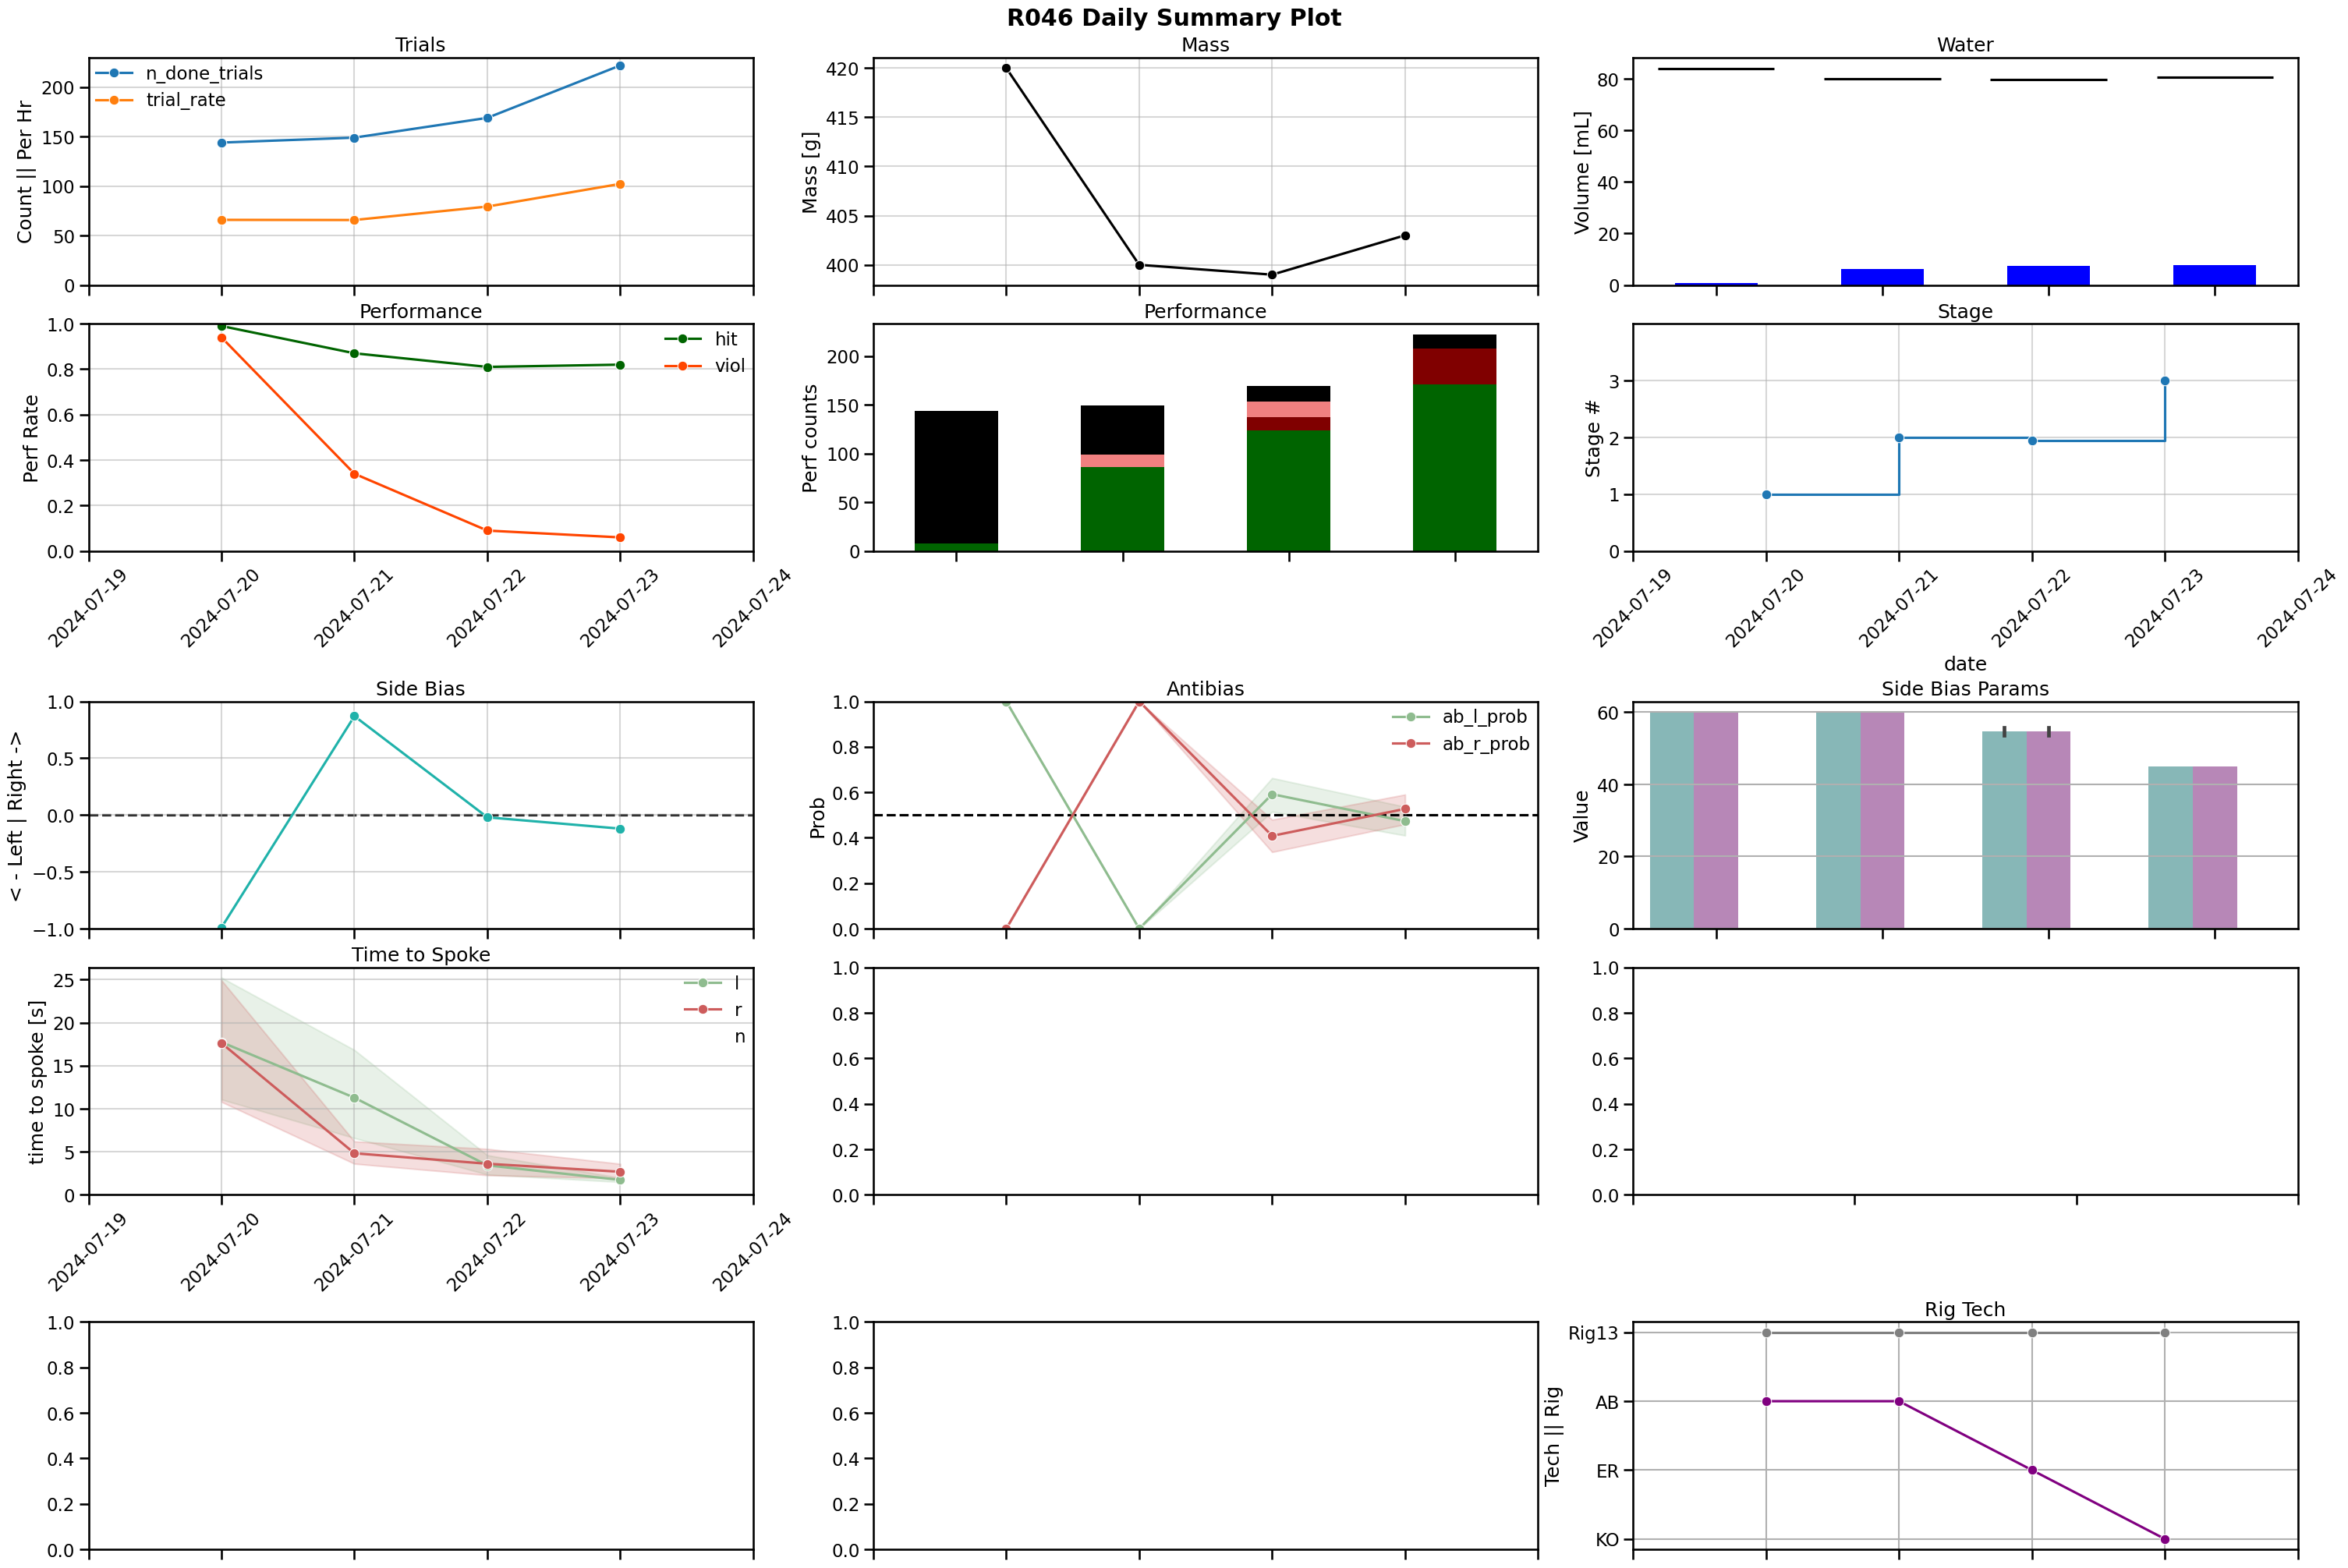

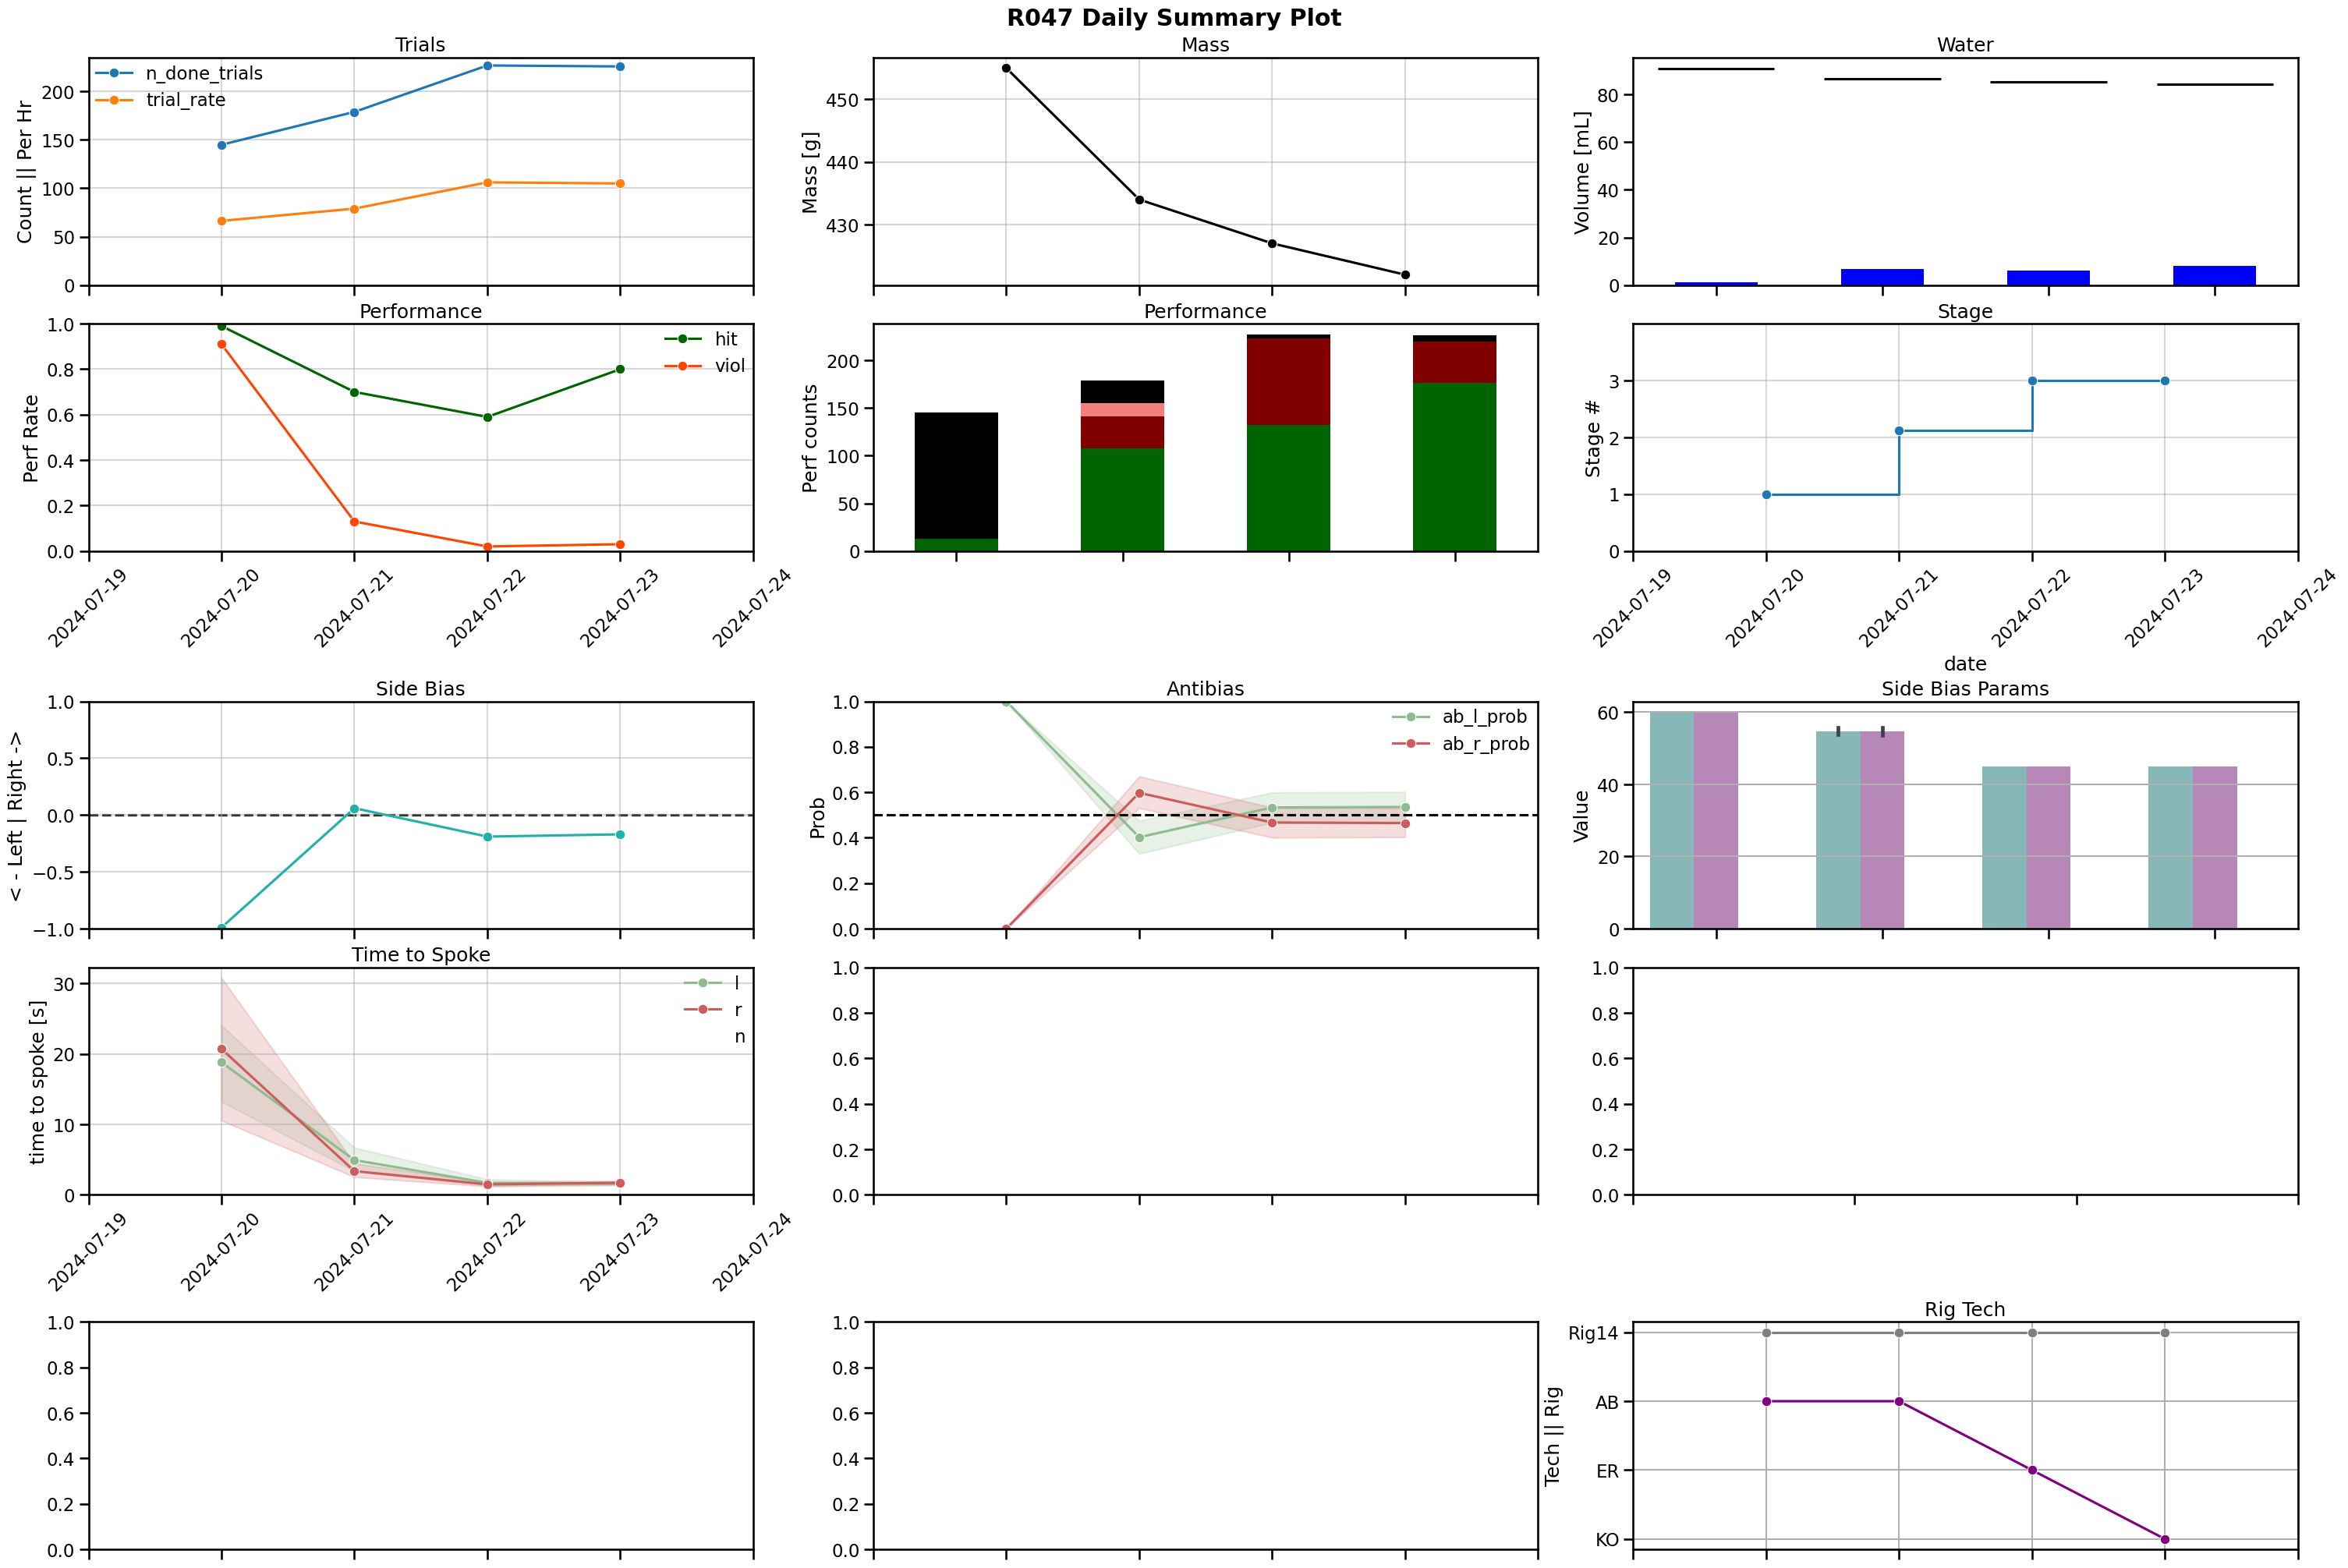

In [25]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

# Plot Within Day (Saved Out)

In [26]:
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R040_2024-07-23_day_summary
R040 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R040'] between 2024-07-23 and 2024-07-23
making R041_2024-07-23_day_summary
R041 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R041'] between 2024-07-23 and 2024-07-23
making R042_2024-07-23_day_summary
R042 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R042'] between 2024-07-23 and 2024-07-23
making R043_2024-07-23_day_summary
R043 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R043'] between 2024-07-23 and 2024-07-23
making R044_2024-07-23_day_summary
R044 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R044'] between 2024-07-23 and 2024-07-23
making R045_2024-07-23_day_summary
R045 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R045'] between 2024-07-23 and 2024-07-23
making R046_2024-07-23_day_summary
R046 2024-07-23 spoke only stage
No data found on SessionAggDate for ['R046'] betwe